<h2 style="text-align:center">2242-ASDS-6302-002-MACHINE LEARNING</h2>

<h2 style="text-align:center">Name: Vineesha Mallu</h2>

<h2 style="text-align:center">UTA ID: 1002419747</h2>

#Importing Required Packages

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#1. Import the Breast Cancer dataset from the sklearn module for this assignment

In [2]:
#Importing breast cancer dataset from load_breast_cancer

breast_cancer_data = load_breast_cancer()

#Creating a dataframe using the breast cancer data

breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns= breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#2. Display the first and last 5 rows of the dataset. Additionally, check the data types of all features and identify any missing values. Explain your findings in detail.

In [3]:
#Displaying first 5 rows of the dataset

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#Displaying last 5 rows of the dataset

breast_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [5]:
#checking the data types of all features in the dataset

breast_cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Dataset contains 30 features of float datatype and a target variable named 'target' of int datatype.

In [6]:
#checking missing values in the dataset

missing_values = breast_cancer_df.isnull().sum()
missing_values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
print("Any Missing Values:", breast_cancer_df.isna().any().any())

Any Missing Values: False


The dataset appears to be clean with no missing and nan values,  as there is no need for imputation or handling of missing data.

#3. Apply two sampling methods—Random Sampling and Stratified Sampling—to generate 100 random samples from the Breast Cancer dataset.

In [8]:
#Applying random sampling to generate 100 random samples from the Breast Cancer dataset

random_samples = breast_cancer_df.sample(n=100)
print("Random Sampling:")
random_samples.head()

Random Sampling:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
268,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062,1
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.21630,0.3013,0.10670,0
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.2517,0.3630,0.09653,0.2112,0.08732,1
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,...,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618,0
216,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,...,27.10,86.20,531.2,0.1405,0.3046,0.2806,0.11380,0.3397,0.08365,1


In [58]:
random_samples.shape

(100, 31)

In [64]:
#Applying Stratified sampling to generate 100 random samples from the Breast Cancer dataset

X = breast_cancer_df.drop(columns=['target'])
y = breast_cancer_df['target']
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=100)
for train_index, test_index in stratified_split.split(X, y):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# Print the results
print(X_test.shape)
print("\nTesting Set:")
X_test.head()

(100, 30)

Testing Set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
562,15.22,30.62,103.40,716.9,0.1048,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
515,11.34,18.61,72.76,391.2,0.1049,0.08499,0.04302,0.02594,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783
487,19.44,18.82,128.10,1167.0,0.1089,0.14480,0.22560,0.11940,0.1823,0.06115,...,23.96,30.39,153.90,1740.0,0.1514,0.3725,0.5936,0.20600,0.3266,0.09009
394,12.10,17.72,78.07,446.2,0.1029,0.09758,0.04783,0.03326,0.1937,0.06161,...,13.56,25.80,88.33,559.5,0.1432,0.1773,0.1603,0.06266,0.3049,0.07081
565,20.13,28.25,131.20,1261.0,0.0978,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637


In [53]:
#Checking the proportion of values in target variable

y_test.value_counts()

target
1    63
0    37
Name: count, dtype: int64

#4. Remove the target variable from the Breast Cancer dataset

In [9]:
#Dropping target variable from the Breast Cancer dataset using .drop() method

df_without_target = breast_cancer_df.drop('target', axis=1)
df_without_target.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#5. Normalize the dataset using two different normalization methods, such as Standardization and Min-Max Scaling. Provide the normalized datasets.

In [10]:
#Normalizing the dataset using Standardization method

standard_scaler = StandardScaler()
df_standard_scaler = pd.DataFrame(standard_scaler.fit_transform(df_without_target), columns = df_without_target.columns)
df_standard_scaler.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
#Normalizing the dataset using Min-Max Scaling method

minmax_scaler = MinMaxScaler()
df_minmax_scalar = pd.DataFrame(minmax_scaler.fit_transform(df_without_target), columns = df_without_target.columns)
df_minmax_scalar.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#6. Apply Principal Component Analysis (PCA) to the standardized dataset. Share your conclusions based on the analysis

In [75]:
#Applying Principal Component Analysis (PCA) to the standardized dataset

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_standard_scaler))
cumulative_explained_variance_pca = np.cumsum(pca.explained_variance_ratio_)
explained_variance_percentage = pca.explained_variance_ratio_*100
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [76]:
#Checking no. of components needed to cover 95% explained variance

target_explained_variance = 0.95 
num_components_needed = np.argmax(cumulative_explained_variance_pca >= target_explained_variance) + 1

print(f"Number of components needed to cover {target_explained_variance * 100}% explained variance: {num_components_needed}")

Number of components needed to cover 95.0% explained variance: 10


In [77]:
pca = PCA(n_components=10)
pca_df_data = pd.DataFrame(pca.fit_transform(df_standard_scaler), columns = ['PC1','PC2','PC3','PC4','PC5'
                                                            ,'PC6','PC7','PC8','PC9','PC10',])
pca_df_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159366,-0.398410,-0.157139,-0.877399
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013360,0.240989,-0.711896,1.106999
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,0.097371,0.024056,0.454283
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059563,-1.405443,-1.116964
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636377,-0.263799,0.377699


PCA is a method employed for dimensionality reduction. In this case, the initial 10 components account for nearly 95% of the variance in the data. Therefore, opting for these 10 components instead of the original 30 features allows for a reduction in dimensionality.

#7. Create a visual representation illustrating the explained variance by each principal component. Include a title, x-axis label, and y-axis label in your graph for clarity

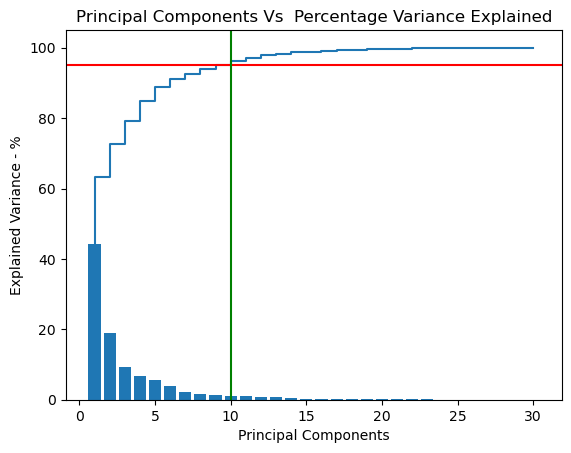

In [82]:
# We can plot a bar graph for variance explained with steps of cummulaitve variance explianed 

plt.bar(range(1,31), explained_variance_percentage)
plt.step(range(1,31), (cumulative_explained_variance_pca*100))

plt.axhline(95, color='r')
plt.axvline(10, color='g')  
 
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance - %')
plt.title('Principal Components Vs  Percentage Variance Explained')
plt.show()

Above bar graph shows explained variance for each principal component indicates shows that the first singular value itself explains around 44% of varinace in the data. Then the first 10 components contribute significantly to the overall 95% of the variance in the dataset.

#8. Apply another dimensionality reduction technique and repeat question 6 and 7. Compare 2 results.

In [67]:
#Applying Singular Value Decomposition (SVD) to the standardized dataset

U, S, Vt = np.linalg.svd(df_standard_scaler, full_matrices=False)

# Calculate the explained variance by each singular value
explained_variance_svd = (S ** 2) / np.sum(S ** 2)
cumulative_explained_variance_svd = np.cumsum(explained_variance_svd)
explained_variance_svd

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [83]:
#Checking no. of components needed to cover 95% explained variance

target_explained_variance_svd = 0.95 
num_components_needed_svd = np.argmax(cumulative_explained_variance_svd >= target_explained_variance_svd) + 1

print(f"Number of components needed to cover {target_explained_variance_svd * 100}% explained variance with SVD: {num_components_needed_svd}")

Number of components needed to cover 95.0% explained variance with SVD: 10


SVD is a method employed for dimensionality reduction. In this case, the initial 10 components account for nearly 95% of the variance in the data. Therefore, opting for these 10 components instead of the original 30 features allows for a reduction in dimensionality.

In [87]:
svd = TruncatedSVD(n_components=10)
svd_df_data = pd.DataFrame(svd.fit_transform(df_standard_scaler), columns=['SV1', 'SV2', 'SV3', 'SV4', 'SV5', 'SV6', 'SV7', 'SV8', 'SV9', 'SV10'])
svd_df_data.head()

,SV1,SV2,SV3,SV4,SV5,SV6,SV7,SV8,SV9,SV10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


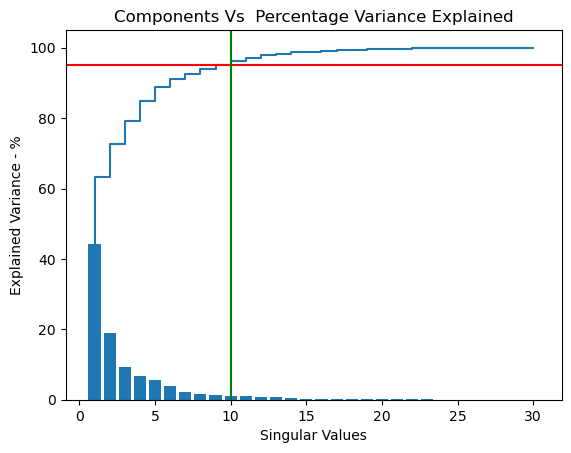

In [89]:
plt.bar(range(1,31), (explained_variance_svd*100))
plt.step(range(1,31), (cumulative_explained_variance_svd*100))

plt.axhline(95, color='r')
plt.axvline(10, color='g')  
 
plt.xlabel('Singular Values')
plt.ylabel('Explained Variance - %')
plt.title('Singular Values Vs  Percentage Variance Explained')
plt.show()

Above bar graph shows singular values in the Singular Value Decomposition reveals that the first singular value itself explains around 44% of varinace in the data. The first 10 singular values contribute significantly to the overall 95% of the variance in the dataset.

Interpretation:

Above explained variance and cumulative explained variance plots of both PCA and SVD exhibit similar patterns,  it suggests that both PCA and SVD are providing consistent insights into the variance structure of the data. The principal components obtained from PCA are proportional to the right singular vectors obtained from SVD because PCA is a technique that uses SVD internally. The principal components obtained from PCA are essentially the eigenvectors of the covariance matrix of the standardized data and SVD is a more general matrix factorization technique, and PCA can be seen as a specific application of SVD.